<a href="https://colab.research.google.com/github/vitor-o-s/ML_DS_from_A_to_Z/blob/master/Models_credit_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando banco (necessario somente no Google Colab usando arquivos do Drive) ###

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1E7yyWmXMCh81ckPSYtHNh4h6vwT-31fN'}) # replace the id with id of file you want to access
downloaded.GetContentFile('credit_data.csv') 

###Pré Processamento ###


In [0]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import collections

In [0]:
data = pd.read_csv('credit_data.csv')

In [0]:
#If you wann see columns and line from your dataset
data.describe()

In [0]:
#See if has no age < 0 
#data.loc[data['age'] <= 0]

#Option 1: Drop all the column
#data.drop('age', 1, inplace= True)

#Option 2: Drop lines
#data.drop(data[data.age <= 0].index, inplace=True)

#Look the mean 
#data['age'].mean()

#Look the mean without the values
#data['age'][data.age > 0].mean()

#Option 3: Overwrite with mean
data.loc[data.age < 0, 'age'] = 40.92

#See if there are no Null data
#data.loc[pd.isnull(data['age'])]

In [0]:
previsores = data.iloc[:, 1:4].values
classe = data.iloc[:, 4].values

In [0]:
imputer = SimpleImputer(missing_values=np.nan,strategy= 'mean')
imputer = imputer.fit(previsores[:, 0:3])
previsores[:, 0:3] = imputer.transform(previsores[:, 0:3])

In [0]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [0]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(
    previsores, classe, test_size = 0.25, random_state = 0)

### Naive Bayes ###

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
classificador = GaussianNB()
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [0]:
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
print (precisao, matriz)

### Decision Tree ###

In [0]:
from sklearn.tree import DecisionTreeClassifier
classificador = DecisionTreeClassifier(criterion  = 'entropy',random_state = 0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [0]:
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
print(precisao, matriz)

0.982 [[430   6]
 [  3  61]]


Save as png:

graph = Source( tree.export_graphviz(dtreg, out_file=None, feature_names=X.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

Get the png image, save it and view it:

graph = Source( tree.export_graphviz(dtreg, out_file=None, feature_names=X.columns))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

In [0]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(classificador, out_file=None))

In [0]:
#graph = Source( tree.export_graphviz(classificador, out_file=None))
#graph.format = graph.render('dtree_render',view=True, format = 'png')

### Random_forest ###


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
Floresta_Aleatoria = RandomForestClassifier(n_estimators= 40,                                        
                                      criterion = 'entropy', random_state = 0)
Floresta_Aleatoria.fit(previsores_treinamento, classe_treinamento)
previsoes = Floresta_Aleatoria.predict(previsores_teste)

In [0]:
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
print(precisao, matriz)

0.984 [[433   3]
 [  5  59]]


In [0]:
estimator = Floresta_Aleatoria.estimators_[4]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                #feature_names = previsores,
                #class_names = classe,
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [0]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

### KNN ###

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
Knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
Knn_model.fit(previsores_treinamento, classe_treinamento)
previsoes = Knn_model.predict(previsores_teste)

precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste,previsoes)

print (precisao, matriz)
collections.Counter(classe_teste)

### Regressãão Logistica ###


In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
regressor = LogisticRegression(random_state=1, solver='lbfgs')
regressor.fit(previsores_treinamento, classe_treinamento)
previsoes = regressor.predict(previsores_teste)

#Metricas de avaliação 
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

print(precisao, matriz)
collections.Counter(classe_teste)

0.946 [[423  13]
 [ 14  50]]


Counter({0: 436, 1: 64})

### Maquinas de Vetores de Suporte ###

In [0]:
from sklearn.svm import SVC

In [0]:
suporte = SVC(kernel='rbf', random_state=1, C=2.0, gamma= 'auto')
suporte.fit(previsores_treinamento,classe_treinamento)
previsoes = suporte.predict(previsores_teste)

precisao = accuracy_score(classe_teste,previsoes)
matriz = confusion_matrix(classe_teste,previsoes)

print(precisao, matriz)
collections.Counter(classe_teste)

0.988 [[434   2]
 [  4  60]]


Counter({0: 436, 1: 64})

###  Keras ###

In [0]:
from keras.models import Sequential
from keras.layers import Dense 

In [0]:
Modelo_Keras = Sequential()
Modelo_Keras.add(Dense(units = 2, activation= 'relu', input_dim = 3))
Modelo_Keras.add(Dense(units = 2, activation= 'relu'))
Modelo_Keras.add(Dense(units = 1, activation= 'sigmoid'))
Modelo_Keras.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
Modelo_Keras.fit(previsores_treinamento, classe_treinamento, batch_size= 10, nb_epoch = 100)
previsoes = Modelo_Keras.predict(previsores_teste)
previsoes = (previsoes > 0.5)

In [15]:
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
print(precisao, matriz)

0.998 [[435   1]
 [  0  64]]


### Redes Neurais ###

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
Neural_Classificador = MLPClassifier(verbose = True, max_iter= 100,
                                     tol = 0.0000010, solver = 'adam',
                                     hidden_layer_sizes = (100), activation = 'relu')
Neural_Classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = Neural_Classificador.predict(previsores_teste)

In [20]:
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
print(precisao, matriz)

0.976 [[433   3]
 [  9  55]]


### Plots ###

In [0]:
import matplotlib.pyplot as plt

In [0]:
data = data.dropna()

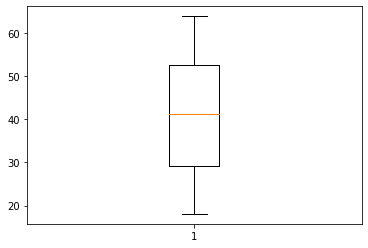

In [25]:
plt.boxplot(data.iloc[:,2], showfliers= True)
outliers_age = data[(data.age < -20)]

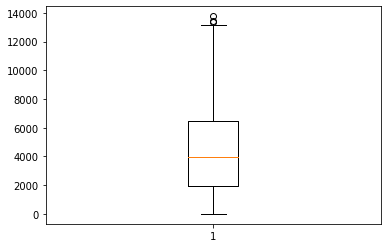

In [26]:
plt.boxplot(data.iloc[:,3])
outliers_loan = data[data.loan > 13400]

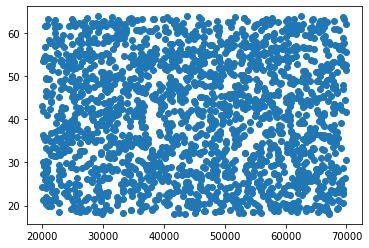

In [31]:
# income x age 
plt.scatter(data.iloc[:, 1], data.iloc[:, 2])

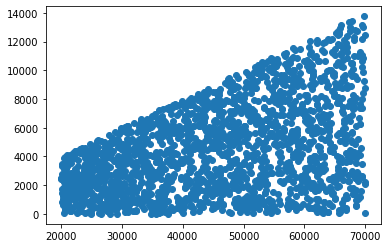

In [29]:
# income x loan
plt.scatter(data.iloc[: ,1], data.iloc[: ,3])

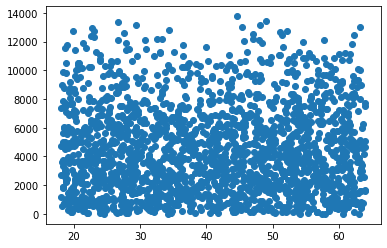

In [30]:
# age x loan
plt.scatter(data.iloc[:, 2], data.iloc[:, 3])

In [0]:
!pip install pyod

In [0]:
from pyod.models.knn import KNN

In [0]:
detector = KNN()
detector.fit(data.iloc[:, 1:4])

In [0]:
previsoes = detector.labels_
confianca_previsoes = detector.decision_scores_

In [0]:
outliers = []

for i in range(len(previsoes)):
  #print(previsoes[i])
  if previsoes[i] == 1:
    outliers.append(i)

lista_outliers = data.iloc[outliers, :]

In [0]:
lista_outliers

In [0]:
!pip freeze 